# PROJECT TITLE :INSURANCE PREMIUN PREDICTION

# Problem Statement:

The goal of this project is to give people an estimate of how much they need based on their individual health situation. After that, customers can work with any health insurance carrier and its plans and perks while keeping the projected cost from our study in mind. This can assist a person in concentrating on the health side of an insurance policy rather han the ineffective part.

# Approach:
The classical machine learning tasks like Data Exploration, Data Cleaning, Feature Engineering, Model Building and Model Testing. Try out different machine learning algorithms that’s best fit for the above case. Some Famous Algorithms: - Multiple Linear Regression, Decision tree Regression and Decision tree, Regression

# Results:
You have to build a solution that should able to predict the premium of the personal for health insurance

import standard library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\bhagy\Desktop\Medical insurence.csv")

In [3]:

df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#shape
df.shape

(1338, 7)

In [5]:
#describing the data 
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#checking the null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
#columns available 
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Visualization

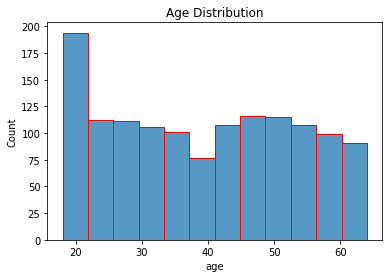

In [9]:
sns.histplot(x='age',data=df,edgecolor='red')
plt.title("Age Distribution")
plt.show()

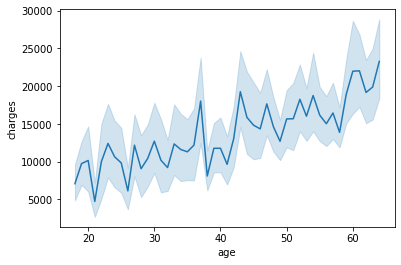

In [10]:
sns.lineplot(x='age',y='charges',data=df)
plt.show()

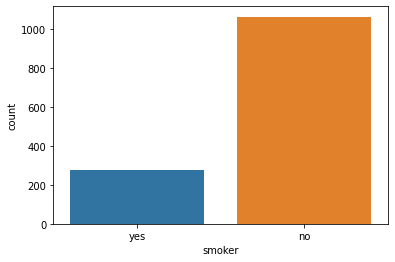

In [11]:
sns.countplot(x='smoker',data=df)
plt.show()

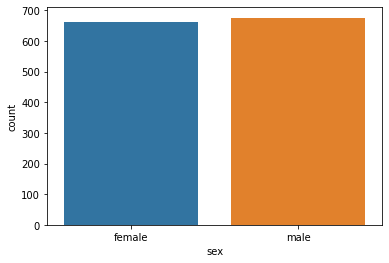

In [12]:
sns.countplot(x='sex',data=df)
plt.show()

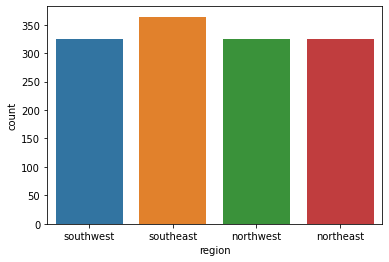

In [13]:
sns.countplot(x='region',data=df)
plt.show()

In [14]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


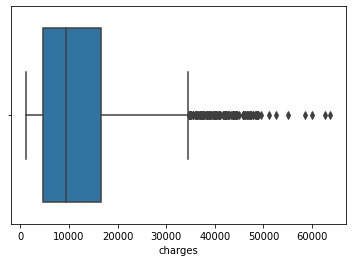

In [16]:
#checking Outliers
sns.boxplot(df.charges)
plt.show()


In [17]:
#as we can see there are outliers we need to remove
percentile25 = df['charges'].quantile(0.25)
percentile75 = df['charges'].quantile(0.75)
IQR = percentile75 - percentile25
upperlimit = percentile75 + 1.5 * IQR
lowerlimit = percentile25 - 1.5 * IQR

In [18]:
print(upperlimit)
print(lowerlimit)

34489.350562499996
-13109.1508975


In [19]:
df['charges'] = np.where(df['charges'] > upper_limit, upper_limit, df['charges'])

NameError: name 'upper_limit' is not defined

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='charges'>

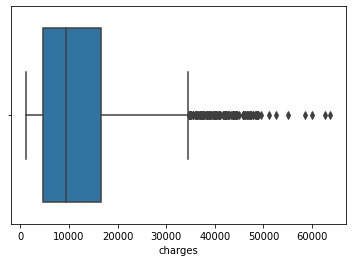

In [20]:
sns.boxplot(df.charges)

In [21]:
#importing the libraries for training the mode

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [22]:
#training and testing the data set
x=df.drop("charges",axis=1)
y=df['charges']

In [23]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [24]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [26]:
x_train.head()

,age,sex,bmi,children,smoker,region
882,21,1,22.135,0,1,2
505,37,0,30.875,3,1,3
798,58,1,33.100,0,1,1
792,22,1,23.180,0,1,2
201,48,1,32.230,1,1,0


In [27]:
x_test.head()

,age,sex,bmi,children,smoker,region
17,23,0,23.845,0,1,2
1091,55,1,29.830,0,1,2
273,50,0,27.455,1,1,2
270,18,0,29.370,1,1,0
874,44,0,21.850,3,1,2


In [28]:
y_train.head()

882     2585.85065
505     6796.86325
798    11848.14100
792     2731.91220
201     8871.15170
Name: charges, dtype: float64

In [29]:
y_test.head()

17       2395.17155
1091    11286.53870
273      9617.66245
270      1719.43630
874      8891.13950
Name: charges, dtype: float64

# LinearRegression

In [30]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred=lr.predict(x_test)

In [32]:
y_test.head()

17       2395.17155
1091    11286.53870
273      9617.66245
270      1719.43630
874      8891.13950
Name: charges, dtype: float64

In [33]:
y_pred[0:5]

array([ 1520.59242161, 11570.5920178 , 10082.43849883,  2246.21754312,
        7881.28362035])

In [34]:
# Calculate evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 4267.213826730733
Mean Squared Error: 38337035.48643883
Root Mean Squared Error: 6191.690842285234
R-squared: 0.7447273869684077


# DecisionTreeRegressor

In [35]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

In [36]:
y_test.head()

17       2395.17155
1091    11286.53870
273      9617.66245
270      1719.43630
874      8891.13950
Name: charges, dtype: float64

In [37]:
y_pred[0:5]

array([ 2396.0959 , 10796.35025,  9447.3824 ,  1720.3537 ,  8302.53565])

In [38]:
# Calculate evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 3217.544519432836
Mean Squared Error: 43709165.74069021
Root Mean Squared Error: 6611.290777200033
R-squared: 0.7089562922515531


# KNeighborsRegressor

In [ ]:
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)
y_pred = kn.predict(x_test)

In [ ]:
y_test.head()

In [ ]:
y_pred[0:5]

In [ ]:
# Calculate evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

# Support Vector Machine

In [ ]:
svr = SVR()
svr.fit(x_train,y_train)
y_pred= svr.predict(x_test)

In [ ]:
y_test.head()

In [ ]:
y_pred[0:5]

In [ ]:
# Calculate evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

# RandomForestRegressor

In [39]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [40]:
y_test.head()

17       2395.17155
1091    11286.53870
273      9617.66245
270      1719.43630
874      8891.13950
Name: charges, dtype: float64

In [41]:
y_pred[0:5]

array([ 4895.0276024, 11815.1362276, 15539.8348326,  2885.2654224,
       10076.5075354])

In [42]:
# Calculate evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 2746.022584713919
Mean Squared Error: 24760951.568610918
Root Mean Squared Error: 4976.037737860407
R-squared: 0.83512567605015


# we can conclude RandomForestRegressor gives a better accuracy